<div class="title">
  <h1>Machine Learning I: Fractal 2</h1>
  <h3>Programming Assignment</h3>
  <h5><small>Submitted by</small>Debonil Ghosh (M21AIE225)</h5>
</div>
<hr>

### Question 1:
 Implement the k-means and spectral clustering algorithms for clustering the points given in the datasets:
http://cs.joensuu.fi/sipu/datasets/jain.txt. Plot the obtained results. In order to evaluate the
performance of these algorithms, find the percentage of points for which the estimated cluster label is
correct. Report the accuracy of both the algorithm. The ground truth clustering is given as the third
column of the given text file. [15 Marks]


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'lightblue'})

- Gaussian Naive Bayes Classifier From Scratch

In [29]:
class GaussianNBClassifierFromScratch():
    def calcPrior(self, features: pd.DataFrame, target: pd.DataFrame):
        self.prior = (features.groupby(target).apply(
            lambda x: len(x)) / self.dataCount).to_numpy()
        return self.prior

    def calcStatistics(self, features: pd.DataFrame, target: pd.DataFrame):
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
        return self.mean, self.var

    def gaussianDensity(self, class_idx, x):
        '''
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²))
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob

    def calcPosterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.classCount):
            prior = self.prior[i]
            conditional = np.prod(self.gaussianDensity(i, x))

            #print('posteriors for [{}], prob ==> [{}]'.format(x, self.gaussianDensity(i, x)))
            #print('posteriors for [{}], cond ==> [{}]'.format(x, conditional))
            posterior = prior * conditional
            posteriors.append(posterior)

        #print('posteriors for [{}]==> [{}]'.format(x, posteriors))
        return posteriors

    def fit(self, features: pd.DataFrame, target: pd.DataFrame):
        self.classes = np.unique(target)
        self.classCount = len(self.classes)
        self.featureCount = features.shape[1]
        self.dataCount = features.shape[0]

        self.calcStatistics(features, target)
        self.calcPrior(features, target)

        print('GaussianNBClassifier trained :')
        print('\t mean ==> {}'.format(self.mean))
        print('\t var ==> {}'.format(self.var))
        print('\t prior ==> {}'.format(self.prior))

    def predict(self, features):
        classProbabilities = self.predictProbabilities(features)
        # return class with highest posterior probability
        return np.array([self.classes[np.argmax(cp)] for cp in classProbabilities])

    def predictProbabilities(self, features):

        return np.array([self.calcPosterior(f) for f in features.to_numpy()])


- Utility function for confusion Matrix And Accuracy Report

In [30]:

from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'lightblue'})


def confusionMatrixAndAccuracyReport(Y_test, Y_pred):
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    overallAccuracy = np.trace(cm)/sum(cm.flatten())

    classwiseAccuracy = np.zeros(len(cm))
    for n in range(len(cm)):
        for i in range(len(cm)):
            for j in range(len(cm)):
                if (i != n and j != n) or (i == n and j == n):
                    classwiseAccuracy[n] += cm[i][j]

    classwiseAccuracy /= sum(cm.flatten())

    plt.figure(figsize=(6, 6))
    plt.title('Accuracy Score: {0:3.3f}'.format(overallAccuracy), size=12)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    sns.heatmap(data=cm, annot=True, square=True,  cmap='Blues')

    plt.show()
    print('Overall Accuracy Score: {0:3.3f}'.format(overallAccuracy))
    print('Classwise Accuracy Score: {0}'.format(classwiseAccuracy))


- Data load

In [31]:
data = pd.read_csv('data-ques-1/jain.txt',sep='\t',names=['X','Y','Class'])
x=data.drop('Class',axis=1)
data['Class'] = data['Class']-1
data.head()

,X,Y,Class
0,0.85,17.45,1
1,0.75,15.60,1
2,3.30,15.45,1
3,5.25,14.20,1
4,4.90,15.65,1


- Visualize Acutal Data

<AxesSubplot:xlabel='X', ylabel='Y'>

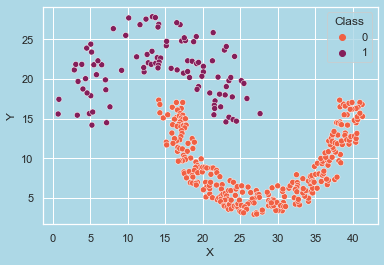

In [32]:
sns.scatterplot(data = data , x = 'X',y = 'Y' , hue = 'Class',  palette= 'rocket_r' )

#### Applied KMeans Clustering

<AxesSubplot:xlabel='X', ylabel='Y'>

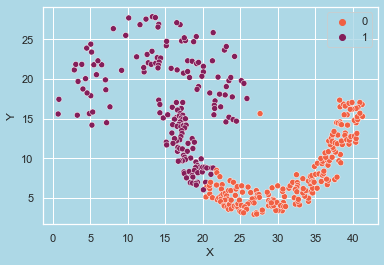

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
pred = kmeans.predict(x)

sns.scatterplot(data = data , x = 'X',y = 'Y' , hue = pred,  palette= 'rocket_r' )


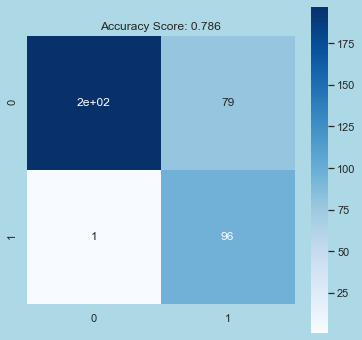

Overall Accuracy Score: 0.786
Classwise Accuracy Score: [0.78552279 0.78552279]


In [34]:

#accuracy = len(data[data['Class']==pred])/len(pred)

#print(f'Accuracy {accuracy}')

confusionMatrixAndAccuracyReport(data['Class'], pred)

#### Applied SpectralClustering

<AxesSubplot:xlabel='X', ylabel='Y'>

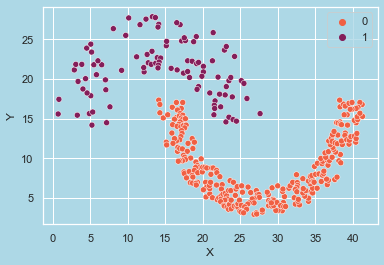

In [35]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2)

pred = model.fit_predict(x)

sns.scatterplot(data = data , x = 'X',y = 'Y' , hue = pred,  palette= 'rocket_r' )

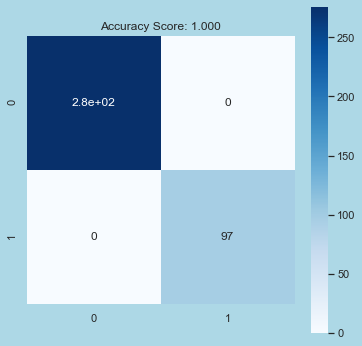

Overall Accuracy Score: 1.000
Classwise Accuracy Score: [1. 1.]


In [36]:
confusionMatrixAndAccuracyReport(data['Class'], pred)

<hr>